# Libraries

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

from IPython.display import display
import warnings
warnings.filterwarnings("ignore")


#Read and scale data

In [8]:

np.random.seed(42)
n_obs = 100  # 100 observações
n_vars = 5   # 5 variáveis macroeconômicas

data = {
    'GDP_growth': np.random.normal(2, 0.5, n_obs),    # Crescimento do PIB (média 2%, desvio-padrão 0.5%)
    'Inflation_rate': np.random.normal(3, 1, n_obs),  # Taxa de inflação (média 3%, desvio-padrão 1%)
    'Unemployment_rate': np.random.normal(5, 1.5, n_obs),  # Taxa de desemprego (média 5%, desvio-padrão 1.5%)
    'Interest_rate': np.random.normal(1.5, 0.7, n_obs),    # Taxa de juros (média 1.5%, desvio-padrão 0.7%)
    'Exchange_rate': np.random.normal(1.2, 0.2, n_obs)     # Taxa de câmbio (média 1.2, desvio-padrão 0.2)
}

df = pd.DataFrame(data)

X = df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Analysis

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

# os Autovalores estarão ordenados do maior para o menor e os autovetores ordenados de acordo com os autovalores
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

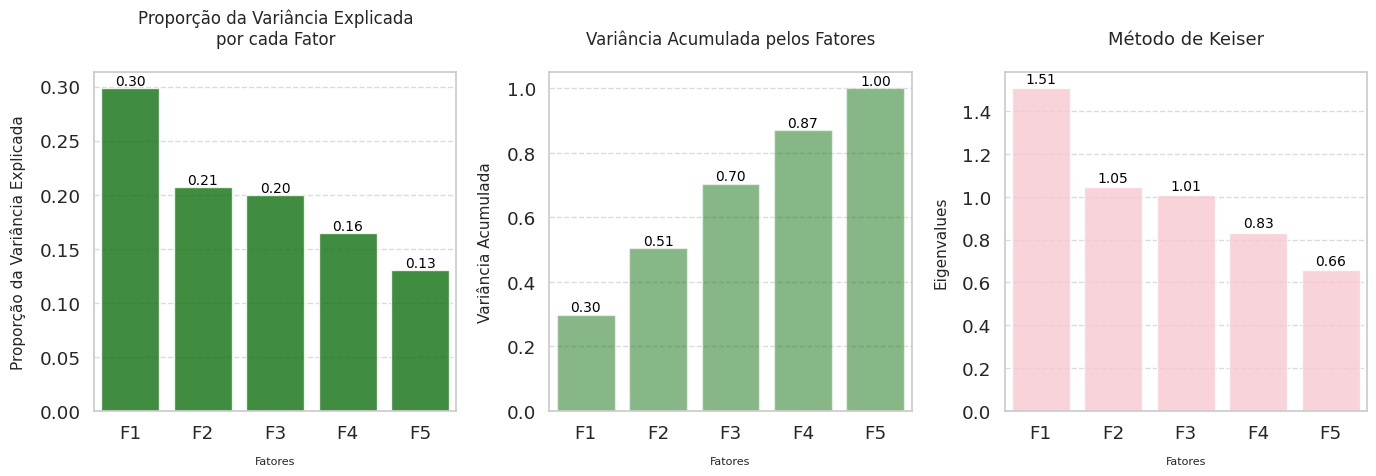

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

fatores_x = [f'F{i}' for i in range(1, X.shape[1] + 1)]

# Primeiro subplot: Proporção da Variância Explicada por cada Componente Principal
sns.barplot(x=fatores_x, y=explained_variance_ratio, ax=ax1, color='green', alpha=0.8)
ax1.set_xlabel('Fatores', fontsize=8, labelpad=10)
ax1.set_ylabel('Proporção da Variância Explicada', fontsize=11, labelpad=10)
ax1.set_title('Proporção da Variância Explicada\npor cada Fator', fontsize=12, pad=20)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(explained_variance_ratio):
    ax1.text(i, value , f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Segundo subplot: Variância Acumulada
# Para o escolher o número de fatores, devemos escolher de forma a que a variância acumulada esteja entre 0.7-0.9
cumulative_variance = np.cumsum(explained_variance_ratio)
sns.barplot(x=fatores_x, y=cumulative_variance, ax=ax2, color='green', alpha=0.5)
ax2.set_xlabel('Fatores', fontsize=8, labelpad=10)
ax2.set_ylabel('Variância Acumulada', fontsize=11, labelpad=10)
ax2.set_title('Variância Acumulada pelos Fatores', fontsize=12, pad=20)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(cumulative_variance):
    ax2.text(i, value , f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Terceiro subplot: Método de Keiser (Eigenvalues)
# Para definir a quantidade de fatores a serem utilizados usando o método de Keiser, basta usar os fatores que explicam a variância de mais de 1 variável
sns.barplot(x=fatores_x, y=eigenvalues, ax=ax3, color='pink', alpha=0.8)
ax3.set_xlabel('Fatores', fontsize=8, labelpad=10)
ax3.set_ylabel('Eigenvalues', fontsize=11, labelpad=10)
ax3.set_title('Método de Keiser', fontsize=13, pad=20)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(eigenvalues):
    ax3.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [11]:
# Componentes principais
print("Componentes principais:")
print(eigenvectors)

print()

# DataFrame para ver a relação de cada variável com os componentes
pca_df = pd.DataFrame(eigenvectors, columns=df.columns, index=fatores_x)
pca_df

Componentes principais:
[[-0.52970882  0.36915369 -0.35045065  0.40692586  0.54289024]
 [ 0.13322516 -0.38140379  0.53131186  0.7191147   0.1932976 ]
 [ 0.29002166  0.70296649  0.55550793 -0.16942834  0.29056933]
 [ 0.66772453 -0.20204025 -0.41808171 -0.07698794  0.57671851]
 [ 0.41435615  0.42810579 -0.33393214  0.53165054 -0.50087069]]



,GDP_growth,Inflation_rate,Unemployment_rate,Interest_rate,Exchange_rate
F1,-0.529709,0.369154,-0.350451,0.406926,0.542890
F2,0.133225,-0.381404,0.531312,0.719115,0.193298
F3,0.290022,0.702966,0.555508,-0.169428,0.290569
F4,0.667725,-0.202040,-0.418082,-0.076988,0.576719
F5,0.414356,0.428106,-0.333932,0.531651,-0.500871


## Function

In [ ]:
def run_pca(df, n_components):
    """
    - Usar como parâmetro df apenas com valores numéricos.
    - Remover também linhas totalmente nulas.
    - Executa PCA após tratar missing values, remover colunas com mais de 20% de valores nulos e remover linhas totalmente nulas.
    - Parâmetro para definir o número de fatores."""

    missing_threshold = 0.20
    df = df.loc[:, df.isnull().mean() <= missing_threshold]

    df.fillna(method='ffill', inplace=True)

    imputer = SimpleImputer(strategy='mean')
    df_imputed = imputer.fit_transform(df)

    # Padronizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_imputed)

    # Aplicando PCA
    pca = PCA(n_components=n_components)
    pca.fit_transform(X_scaled)

    # os Autovalores estarão ordenados do maior para o menor e os autovetores ordenados de acordo com os autovalores
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_
    explained_variance_ratio = pca.explained_variance_ratio_

    # Criando os fatores de acordo com o número de componentes principais
    fatores_x = [f'F{i}' for i in range(1, n_components + 1)]
    pca_df = pd.DataFrame(eigenvectors, columns=df.columns, index=fatores_x)

    # Exibindo os resultados
    print("Valores próprios (Explained Variance):")
    display(pd.DataFrame(eigenvalues, columns=["Eigenvalue"]))

    print("\nProporção da Variância Explicada:")
    display(pd.DataFrame(explained_variance_ratio, columns=["Explained Variance Ratio"]))

    print("\nVetores próprios (Components):")
    display(pca_df)


# Run PCA analysis

In [13]:
run_pca(df, 5)

Valores próprios (Explained Variance):


,Eigenvalue
0,1.506744
1,1.045661
2,1.007949
3,0.832110
4,0.658040



Proporção da Variância Explicada:


,Explained Variance Ratio
0,0.298335
1,0.207041
2,0.199574
3,0.164758
4,0.130292



Vetores próprios (Components):


,GDP_growth,Inflation_rate,Unemployment_rate,Interest_rate,Exchange_rate
F1,-0.529709,0.369154,-0.350451,0.406926,0.542890
F2,0.133225,-0.381404,0.531312,0.719115,0.193298
F3,0.290022,0.702966,0.555508,-0.169428,0.290569
F4,0.667725,-0.202040,-0.418082,-0.076988,0.576719
F5,0.414356,0.428106,-0.333932,0.531651,-0.500871
